## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Generate Datasets

In [4]:
from sklearn import datasets

In [11]:
X, y = datasets.make_moons(n_samples=300, noise=0.3, random_state=1)

## Visualize generated dataset

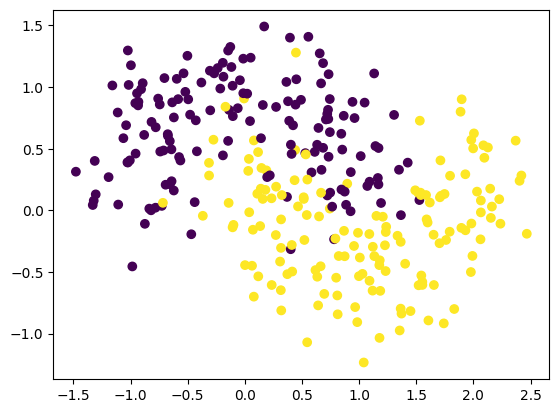

In [13]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

# WITHOUT REGULARIZATION

In [14]:
model_1 = Sequential()

# Hidden layers
model_1.add(Dense(128, activation='relu', input_dim=2))
model_1.add(Dense(128, activation='relu'))

# Output layer
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

c:\Users\7200\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_1.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)
history_1 = history_1.history

## Plot learning curve

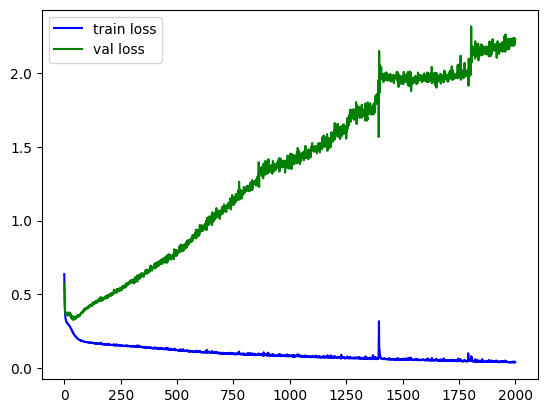

In [17]:
plt.plot(history_1['loss'], label='train loss', color='blue')
plt.plot(history_1['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

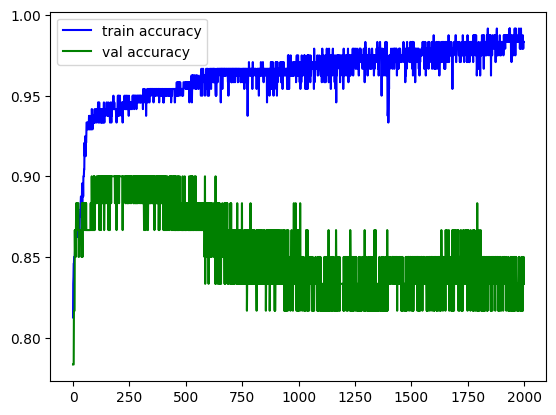

In [18]:
plt.plot(history_1['accuracy'], label='train accuracy', color='blue')
plt.plot(history_1['val_accuracy'], label='val accuracy', color='green')
plt.legend()
plt.show()

## Plot decision boundary

In [19]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 621us/step


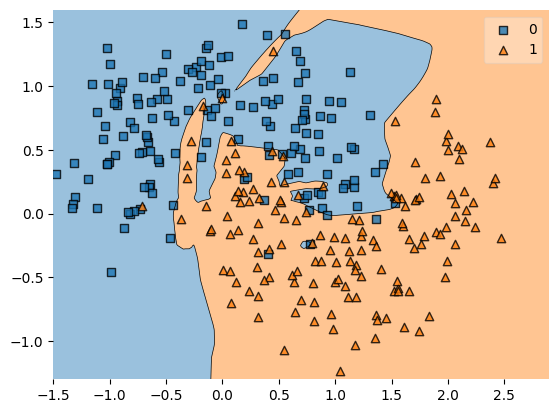

In [21]:
plot_decision_regions(X, y, clf=model_1)
plt.xlim(-1.5, 2.9)
plt.ylim(-1.3, 1.6)
plt.show()

# WITH L2 REGULARIZATION

In [26]:
from tensorflow.keras.regularizers import l2

In [29]:
model_l2 = Sequential()

# Hidden layers
model_l2.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l2(0.001)))
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

# Output layer
model_l2.add(Dense(1, activation='sigmoid'))

model_l2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l2 = model_l2.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)
history_l2 = history_l2.history

## Plot learning curves

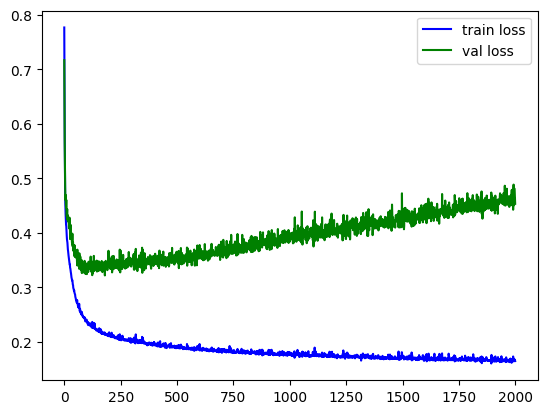

In [31]:
plt.plot(history_l2['loss'], label='train loss', color='blue')
plt.plot(history_l2['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

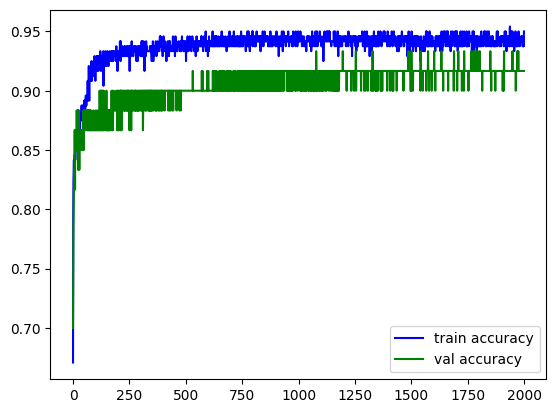

In [32]:
plt.plot(history_l2['accuracy'], label='train accuracy', color='blue')
plt.plot(history_l2['val_accuracy'], label='val accuracy', color='green')
plt.legend()
plt.show()

## Plot decision boundary

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 747us/step


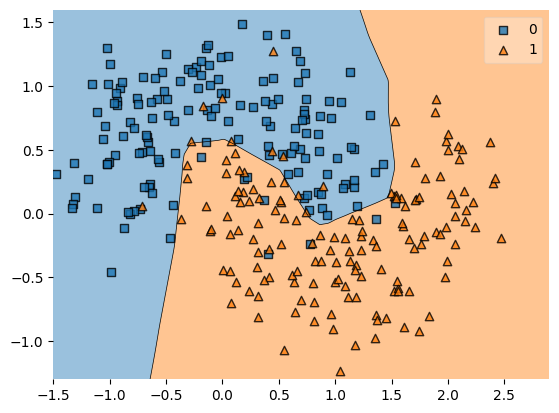

In [33]:
plot_decision_regions(X, y, clf=model_l2)
plt.xlim(-1.5, 2.9)
plt.ylim(-1.3, 1.6)
plt.show()

# WITH L1 REGULARIZATION

In [34]:
from tensorflow.keras.regularizers import l1

In [35]:
model_l1 = Sequential()

# Hidden layers
model_l1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l1(0.001)))
model_l1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))

# Output layer
model_l1.add(Dense(1, activation='sigmoid'))

model_l1.summary()

c:\Users\7200\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l1 = model_l1.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)
history_l1 = history_l1.history

## Plot learning curves

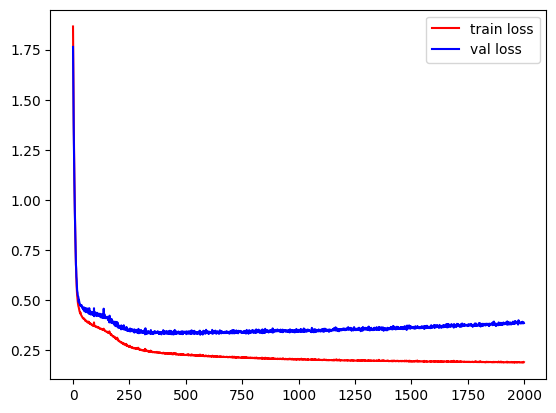

In [37]:
plt.plot(history_l1['loss'], color='red', label='train loss')
plt.plot(history_l1['val_loss'], color='blue', label='val loss')
plt.legend()
plt.show()

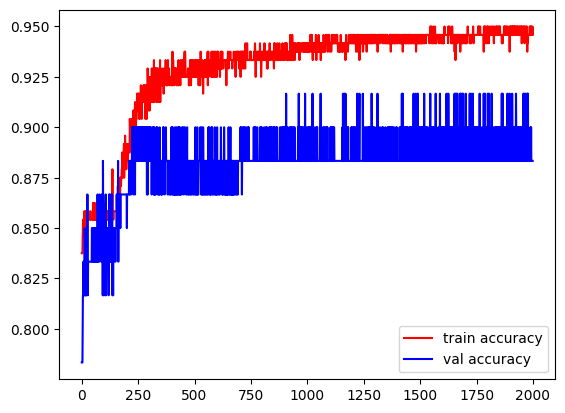

In [39]:
plt.plot(history_l1['accuracy'], color='red', label='train accuracy')
plt.plot(history_l1['val_accuracy'], color='blue', label='val accuracy')
plt.legend()
plt.show()

## Plot decision boundaries

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 638us/step


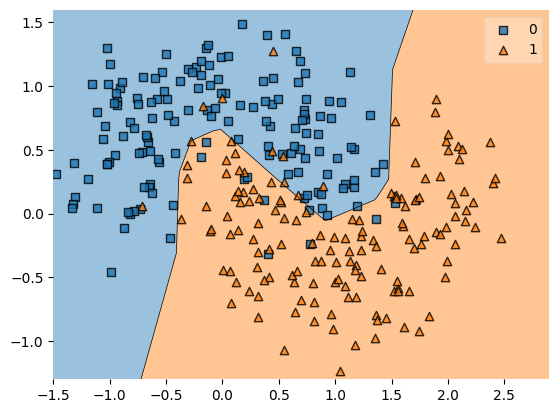

In [40]:
plot_decision_regions(X, y, clf=model_l1)
plt.xlim(-1.5, 2.9)
plt.ylim(-1.3, 1.6)
plt.show()

# Comparing L1 and L2 Regulizers

## Comparing weights of L1 and L2 models (for first layers)

In [47]:
weights_layer1_l1 = model_l1.get_weights()[0].reshape(256)
weights_layer1_l2 = model_l2.get_weights()[0].reshape(256)

## Box plot

<Axes: >

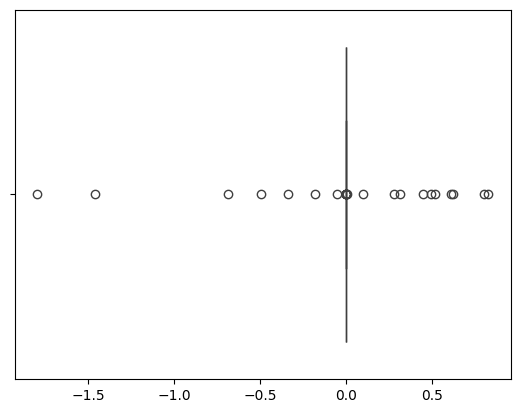

In [49]:
sns.boxplot(weights_layer1_l1, orient='h')

<Axes: >

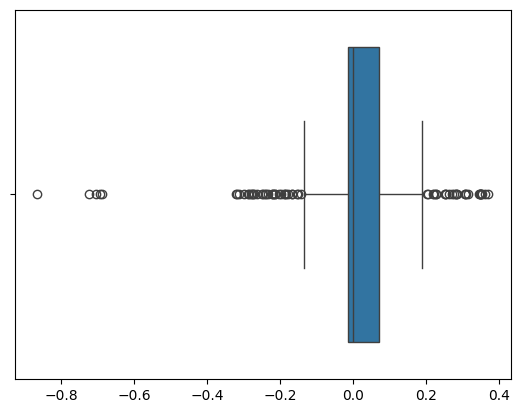

In [50]:
sns.boxplot(weights_layer1_l2, orient='h')

## Distribution plot

C:\Users\7200\AppData\Local\Temp\ipykernel_1060\3612996788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_layer1_l2)


<Axes: ylabel='Density'>

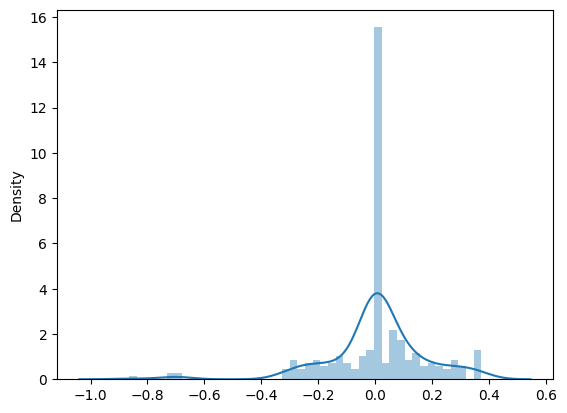

In [54]:
sns.distplot(weights_layer1_l2)

C:\Users\7200\AppData\Local\Temp\ipykernel_1060\2747163073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_layer1_l1)


<Axes: ylabel='Density'>

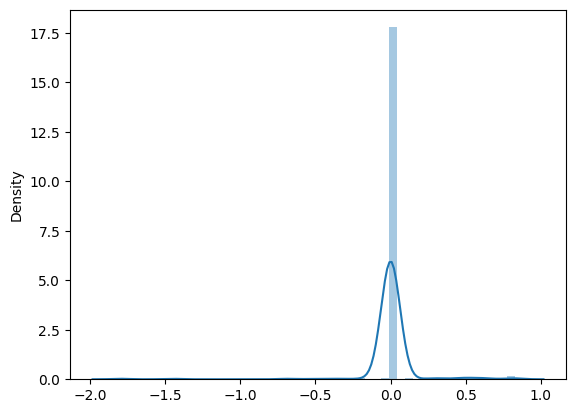

In [57]:
sns.distplot(weights_layer1_l1)